<a href="https://www.kaggle.com/code/mrafraim/dl-day-8-summary-day-1-7?scriptVersionId=286306570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 8: Summary (Day 1 → 7)

Welcome to Day 8!

This notebook consolidates everything learned so far:
- What Deep Learning is
- Neurons, weights, bias, activations
- Forward propagation
- Loss functions
- Gradient Descent intuition
- Tiny neural networks
- Manual calculations

---


# Big Picture (Mental Model)

Deep Learning pipeline:

$$
\text{Input} \rightarrow \text{Linear Combination} \rightarrow \text{Activation} \rightarrow \text{Prediction} \rightarrow \text{Loss}
$$

Training loop (intuition):

1. Guess parameters (weights, bias)
2. Make prediction (forward pass)
3. Measure error (loss)
4. Adjust parameters (gradient descent)
5. Repeat


# Single Neuron Recap

Mathematical form:

$$
z = w x + b
$$

Activation:
- ReLU: $ \max(0, z) $
- Sigmoid: $ \frac{1}{1 + e^{-z}} $

Neuron output:
$$
a = f(z)
$$


# Code: Single Neuron Forward Pass

In [21]:
import numpy as np

x = 2.5
w = 0.8
b = -0.4

z = w * x + b
a_relu = max(0, z)
a_sigmoid = 1 / (1 + np.exp(-z))

z, a_relu, a_sigmoid

(1.6, 1.6, 0.8320183851339245)

# Forward Propagation (Vectorized)

For a layer:

$$
Z = W X + b
$$
$$
A = f(Z)
$$

Why vectorization?
- Faster computation
- Cleaner math
- Scales to large networks


# Code: Layer Forward Propagation

In [22]:
X = np.array([[1],
              [2]])

W = np.array([[0.5, -0.3],
              [0.8,  0.1]])

b = np.array([[0.0],
              [-0.2]])

Z = np.dot(W, X) + b
A = np.maximum(0, Z)  # ReLU

Z, A


(array([[-0.1],
        [ 0.8]]),
 array([[0. ],
        [0.8]]))

# Loss Functions

Loss quantifies prediction error.

### Mean Squared Error (Regression)
$$
L = (y - \hat{y})^2
$$

### Binary Cross-Entropy (Classification)
$$
L = -\left[y \log(\hat{y}) + (1-y)\log(1-\hat{y})\right]
$$

Lower loss = better model.


# Code: Loss Examples

In [23]:
y_true = 1
y_pred = 0.7

mse = (y_true - y_pred)**2
bce = -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

mse, bce

(0.09000000000000002, 0.35667494393873245)

# Gradient Descent (Intuition)

Goal:
> Find weights that minimize loss.

Update rule:
$$
w_{new} = w - \alpha \frac{dL}{dw}
$$

Where:
- $\alpha$ = learning rate
- Gradient points to steepest increase
- We move in the opposite direction


# Code: Simple Gradient Step

In [24]:
w = 1.0
grad = 0.6
lr = 0.1

w_new = w - lr * grad
w_new


0.94

# Tiny Neural Network

2-Layer Network:

$$Input → \text{Hidden Layer} → Output$$

Each layer:
$$
Z^{(l)} = W^{(l)} A^{(l-1)} + b^{(l)}
$$
$$
A^{(l)} = f(Z^{(l)})
$$

This structure scales to deep networks.


# Code: Tiny 2-Layer Network (Forward Only)

In [25]:
# Input
X = np.array([[1],
              [2]])

# Layer 1
W1 = np.array([[0.4, -0.2],
               [0.1,  0.6]])
b1 = np.zeros((2,1))

Z1 = np.dot(W1, X) + b1
A1 = np.maximum(0, Z1)

# Layer 2
W2 = np.array([[0.7, -0.3]])
b2 = np.array([[0.1]])

Z2 = np.dot(W2, A1) + b2
A2 = 1 / (1 + np.exp(-Z2))  # Sigmoid

A2


array([[0.42800387]])

# Activation Functions Comparison

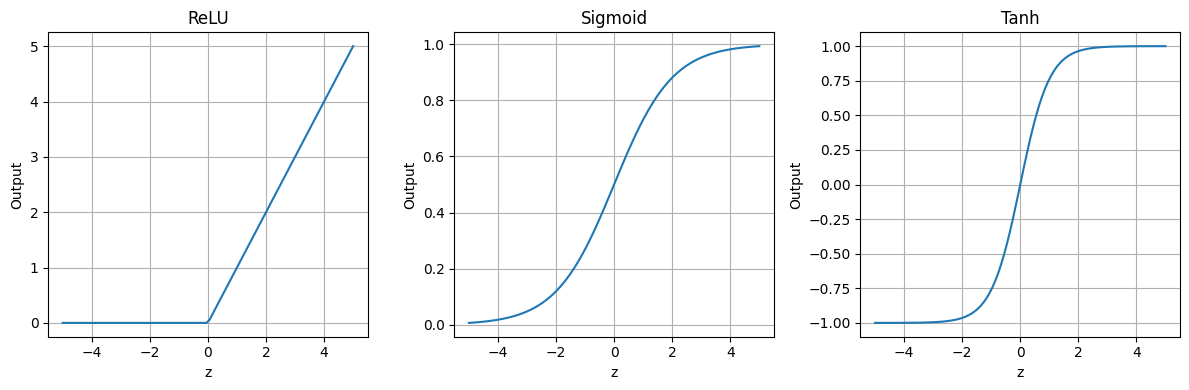

In [26]:
z = np.linspace(-5, 5, 100)

relu = np.maximum(0, z)
sigmoid = 1 / (1 + np.exp(-z))
tanh = np.tanh(z)

plt.figure(figsize=(12, 4))

# ReLU
plt.subplot(1, 3, 1)
plt.plot(z, relu)
plt.title("ReLU")
plt.xlabel("z")
plt.ylabel("Output")
plt.grid(True)

# Sigmoid
plt.subplot(1, 3, 2)
plt.plot(z, sigmoid)
plt.title("Sigmoid")
plt.xlabel("z")
plt.ylabel("Output")
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(z, tanh)
plt.title("Tanh")
plt.xlabel("z")
plt.ylabel("Output")
plt.grid(True)

plt.tight_layout()
plt.show()



# Loss vs Weight Curve

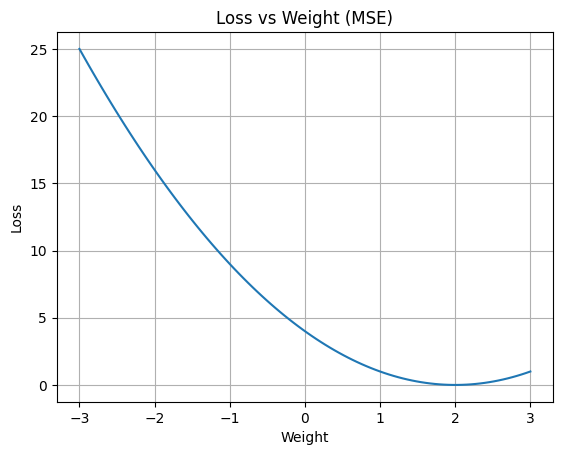

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate weights
weights = np.linspace(-3, 3, 100)

# Simple scenario
x = 1
y_true = 2

# Loss function (MSE)
losses = [(w*x - y_true)**2 for w in weights]

plt.figure()
plt.plot(weights, losses)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.title("Loss vs Weight (MSE)")
plt.grid(True)
plt.show()


What this shows

- The curve’s lowest point = optimal weight

- Gradient descent moves toward this minimum

# Gradient Descent Steps

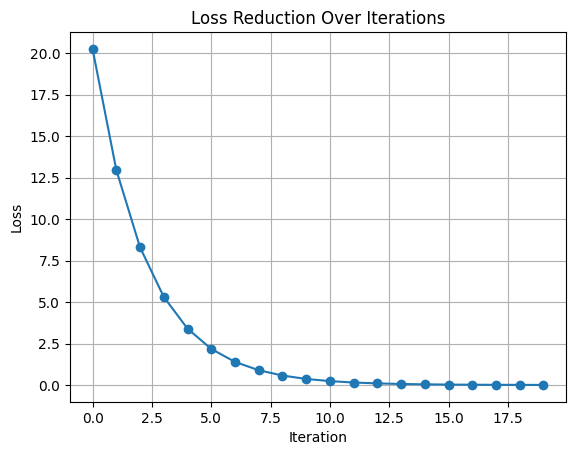

In [28]:
# Gradient descent simulation
w = -2.5
lr = 0.1
steps = []
loss_steps = []

for _ in range(20):
    loss = (w*x - y_true)**2
    grad = 2*(w*x - y_true)*x
    w = w - lr * grad
    steps.append(w)
    loss_steps.append(loss)

plt.figure()
plt.plot(loss_steps, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Iterations")
plt.grid(True)
plt.show()

# Key Takeaways

You now understand:
- What Deep Learning actually does
- How neurons compute outputs
- Why activations matter
- How forward propagation works
- How loss measures error
- Why gradient descent updates weights
---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
